In [163]:
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [164]:
# Study data files
mouse_metadatapath = "data/Mouse_metadata.csv"
study_resultspath = "data/Study_results.csv"

# Read the mouse data 
mousedata = pd.read_csv(mouse_metadatapath)
mousedata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [165]:
#Read the study results
studyresults = pd.read_csv(study_resultspath)
studyresults.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


# Combine the above data into a single dataset

In [166]:
# Combine the above data into a single dataset
combdf = pd.merge(mousedata, studyresults, how='outer', on="Mouse ID")
#ombd Display the data table for preview
combdf.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [167]:
# Checking the number of mice.
total_mice = combdf['Mouse ID'].nunique()
total_mice

249

# Remove Duplicate:
* Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.

In [168]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dupmouse = combdf.loc[combdf.duplicated(['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

dupmouse

array(['g989'], dtype=object)

In [169]:
dupmouse_df = combdf.loc[combdf["Mouse ID"] == "g989", :]
dupmouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [170]:
readydf = combdf.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])
total_mice = readydf["Mouse ID"].nunique()
total_mice                              

249

# Summary Statistics
Use the cleaned data for the remaining steps.

Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

In [171]:
mean = readydf['Tumor Volume (mm3)'].groupby(readydf ['Drug Regimen']).mean()
median = readydf['Tumor Volume (mm3)'].groupby(readydf['Drug Regimen']).median()
var = readydf['Tumor Volume (mm3)'].groupby(readydf['Drug Regimen']).var()
std = readydf['Tumor Volume (mm3)'].groupby(readydf['Drug Regimen']).std()
sem = readydf['Tumor Volume (mm3)'].groupby(readydf['Drug Regimen']).sem()


stat_table = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

# Display the Summary statistics table grouped by 'Drug Regimen' column
stat_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [172]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for eachregimen 
#stat = ['mean', 'median', 'var', 'std', 'sem']
# Using the aggregation method, produce the same summary statistics in a single line
agg_table =  readydf.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts
Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the number of total mice 
for each treatment regimen throughout the course of the study.

NOTE: These plots should look identical.

In [173]:
#first create a group series using the 'Drug Regimen' column and, counting the number of data points for each Drug Regimen 
mice_vsdrug = readydf["Drug Regimen"].value_counts()
mice_vsdrug 

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

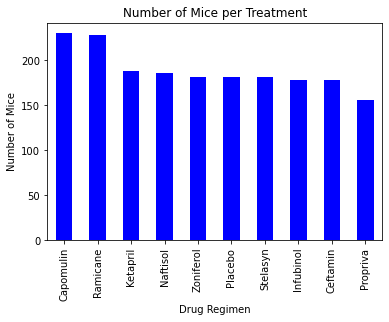

In [174]:
# Create a Pandas bar plot based off of the group series from before and label the title
plot_pandas = mice_vsdrug.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")


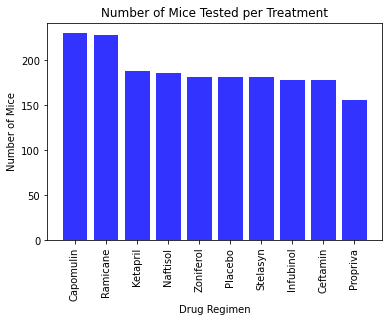

In [175]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = mice_vsdrug.index.values
y_axis = mice_vsdrug.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

In [176]:
readydf.rename(columns = {'Sex':'Gender'},inplace = True)

C:\Users\prern\AppData\Local\Temp\ipykernel_5140\3790271481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readydf.rename(columns = {'Sex':'Gender'},inplace = True)


In [177]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gendersplit = readydf["Gender"].value_counts()
gendersplit

Male      958
Female    930
Name: Gender, dtype: int64

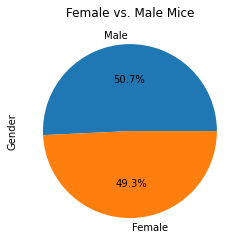

In [178]:
plt.title("Female vs. Male Mice")
gendersplit.plot.pie(autopct= "%1.1f%%")
plt.show()

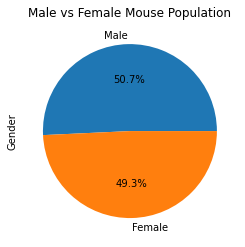

In [179]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gendersplit.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Gender')
plt.show()

# Quartiles, Outliers and Boxplots

Calculate the final tumor volume of each mouse across four of the treatment regimens:  
Capomulin, Ramicane, Infubinol, and Ceftamin
Then, calculate the quartiles and IQR, and determine if there are any potential outliers across all four treatment regimens.
   

In [180]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capo_df = readydf.loc[readydf["Drug Regimen"] == "Capomulin",:]
Rami_df = readydf.loc[readydf["Drug Regimen"] == "Ramicane", :]
Infub_df = readydf.loc[readydf["Drug Regimen"] == "Infubinol", :]
Ceft_df = readydf.loc[readydf["Drug Regimen"] == "Ceftamin", :]

In [181]:
Capo_df.head()

,Mouse ID,Drug Regimen,Gender,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [182]:
# Capomulin :Create a grouped DataFrame that shows the last (greatest) time point for each mouse. 
#Merge this grouped DataFrame with the original cleaned DataFrame.

Capo_last = Capo_df.groupby('Mouse ID').max()['Timepoint']
Capo_merge = pd.merge(Capo_last, readydf, on=("Mouse ID","Timepoint"),how="left")
Capo_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Gender,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [183]:
Capo_merge.to_csv("output.csv")
Capo_tumors = Capo_merge["Tumor Volume (mm3)"]

quartiles =Capo_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [184]:
# Ramicane
Rami_last = Rami_df.groupby('Mouse ID').max()['Timepoint']
Rami_merge = pd.merge(Rami_last, readydf, on=("Mouse ID","Timepoint"),how="left")
Rami_merge.to_csv("output.csv")
Rami_tumors = Rami_merge["Tumor Volume (mm3)"]

quartiles =Rami_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [185]:
# Infubinol 
Infub_last = Infub_df.groupby('Mouse ID').max()['Timepoint']
Infub_merge = pd.merge(Infub_last, readydf, on=("Mouse ID","Timepoint"),how="left")
Infub_merge.to_csv("output.csv")
Infub_tumors = Infub_merge["Tumor Volume (mm3)"]

quartiles =Infub_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [186]:
# Ceftamin
Ceft_last = Ceft_df.groupby('Mouse ID').max()['Timepoint']
Ceft_merge= pd.merge(Ceft_last, readydf, on=("Mouse ID","Timepoint"),how="left")
Ceft_merge.to_csv("output.csv")
Ceft_tumors = Ceft_merge["Tumor Volume (mm3)"]

quartiles = Ceft_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


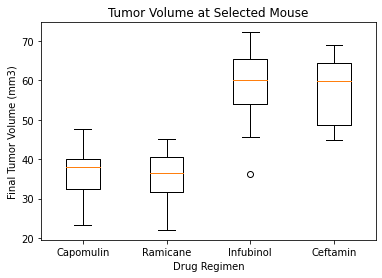

In [187]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [Capo_tumors, Rami_tumors, Infub_tumors, Ceft_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True)

plt.show()

# Line and Scatter Plots
1.	Select a mouse that was treated with Capomulin, and generate a line plot of tumor volume versus time point for that mouse.
2.	Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.


Text(0, 0.5, 'Tumor Volume (mm3)')

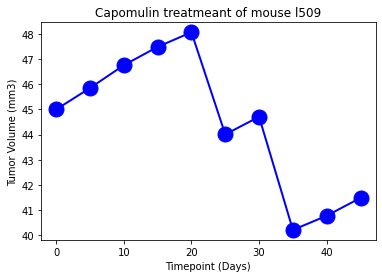

In [188]:
capoline_df = Capo_df.loc[Capo_df["Mouse ID"] == "l509", :]
x_axis = capoline_df["Timepoint"]
tumsiz =capoline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

In [189]:
capo_tum_wt =Capo_df.groupby(['Mouse ID']).mean()
capo_tum_wt.head() 

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

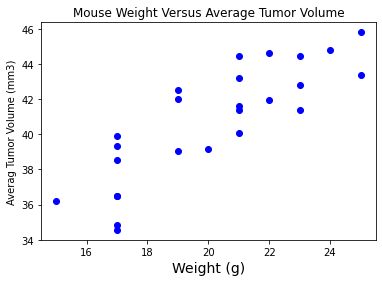

In [190]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots()
marker_size=15
plt.scatter(capo_tum_wt['Weight (g)'],capo_tum_wt['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

# Correlation and Regression

In [191]:
# Calculate the correlation and regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capo_tum_wt['Weight (g)'],capo_tum_wt['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


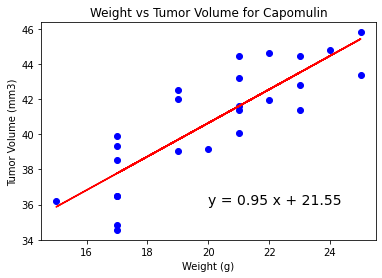

In [192]:
# Add the linear regression equation and line to plot.Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept,rvalue, pvalue, stderr)= linregress(capo_tum_wt["Weight (g)"],capo_tum_wt["Tumor Volume (mm3)"])
regress_values=capo_tum_wt["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(capo_tum_wt["Weight (g)"],capo_tum_wt["Tumor Volume (mm3)"],color='b')
plt.plot(capo_tum_wt ["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Recalculated: Quartiles, Outliers and Boxplots using for loop
o	Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data.
o	Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. Append the resulting final tumor volumes for each drug to the empty list.
o	Determine outliers by using the upper and lower bounds, and then print the results.


In [193]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = readydf[readydf["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Drug Regimen,Gender,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [194]:
# Start by getting the last (greatest) timepoint for each mouse
fin_tum = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
fin_tum.head()

tumor_size
Drug Regimen Mouse ID            
Capomulin    b128       38.982878
             b742       38.939633
             f966       30.485985
             g288       37.074024
             g316       40.159220

In [195]:
fin_tum = fin_tum.stack(level = 0).unstack(level=0)
fin_tum.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,tumor_size,NaN,NaN,67.973419,NaN
a251,tumor_size,NaN,NaN,65.525743,NaN
a275,tumor_size,NaN,62.999356,NaN,NaN
a411,tumor_size,NaN,NaN,NaN,38.407618
a444,tumor_size,NaN,NaN,NaN,43.047543


In [196]:
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [197]:
treatment = 0
for drug in drug_list:
    quartiles = fin_tum[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 

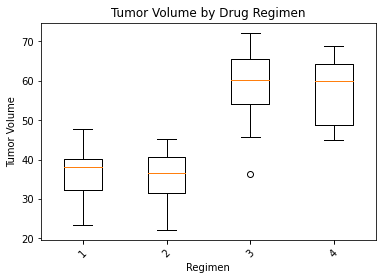

In [199]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(fin_tum[drug].dropna()))
    

fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], drug_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(boxplot_list)
plt.show()

# Observation Analysis:
The bar graph showed the Drug Regimen Capomulin has the maximum mice number (230), and Zoniferol has the smaller mice number (182).I have removed the duplicater occurances of mice g989. The total count of mice by gender showed a 51% Male to 49% Female split.
The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.
The regression analysis helped to understand how much the average tumor volume (dependent variable) will change when weight of mice change(independent variables). The R-squared value is 0.70, which means 70% the model fit the data, wich is fairely good to predict the data from the model. Higher R-squared values represent smaller differences between the observed data, and the fitted value. 70% the model explains all of the variation in the response variable around its mean.
From the selected treatments Capomulin and Ramicane reduces the size of tumors better.